In [1]:
# from me_utils import *
from scipy.stats import wasserstein_distance
from sklearn.preprocessing import MinMaxScaler
# import keras
# from tensorflow import keras
import pandas as pd
from sklearn.neighbors import KernelDensity

# from tensorflow.keras.layers import Lambda, Input, Dense, Add, Activation, Concatenate
# from tensorflow.keras.models import Model
# from tensorflow.keras import initializers
# from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import glob
from matplotlib.cm import get_cmap
from cycler import cycler
import sklearn
from sklearn.utils import shuffle

import torch

In [2]:
nFeat = 4
trainsize = 499889
intermediate_dim = 128
encoder_dim = 128
batch_size = 1024
latent_dim = 20
epochs = 240
eluvar = np.sqrt(1.55/intermediate_dim)

In [3]:
# def sampling(args):
#     """Reparameterization trick by sampling fr an isotropic unit Gaussian.
#     # Arguments:
#         args (tensor): mean and log of variance of Q(z|X)
#     # Returns:
#         z (tensor): sampled latent vector
#     """

#     z_mean, z_log_var = args
#     batch = K.shape(z_mean)[0]
#     dim = K.int_shape(z_mean)[1]
#     # by default, random_normal has mean=0 and std=1.0
#     epsilon = K.random_normal(shape=(batch, dim))
#     return z_mean + K.exp(0.5 * z_log_var) * epsilon

# load model

In [4]:
# def create_encoder(X,y):
# 	inputs = Concatenate()([X, y])
# 	x1 = Dense(encoder_dim, activation='elu', kernel_initializer=initializers.random_normal(mean=0.0, stddev=eluvar))(inputs)
# 	x2 = Dense(encoder_dim, kernel_initializer=initializers.random_normal(mean=0.0, stddev=eluvar))(x1)
# 	x2 = Activation('elu')(x2)
# 	x3 = Dense(encoder_dim, kernel_initializer=initializers.random_normal(mean=0.0, stddev=eluvar))(x2)
# 	sc1 = Add()([x1,x3])
# 	x3 = Activation('elu')(sc1)
# 	x4 = Dense(encoder_dim, kernel_initializer=initializers.random_normal(mean=0.0, stddev=eluvar))(x3)
# 	sc2 = Add()([x2,x4])
# 	x4 = Activation('elu')(sc2)
# 	x5 = Dense(encoder_dim, kernel_initializer=initializers.random_normal(mean=0.0, stddev=eluvar))(x4)
# 	sc3 = Add()([x3,x5])
# 	x5 = Activation('elu')(sc3)
# 	x6 = Dense(encoder_dim, kernel_initializer=initializers.random_normal(mean=0.0, stddev=eluvar))(x5)
# 	sc4 = Add()([x4,x6])
# 	x6 = Activation('elu')(sc4)
# 	z_mean = Dense(latent_dim, name='z_mean')(x6)
# 	z_log_var = Dense(latent_dim, name='z_log_var')(x6)

# 	# use reparameterization trick to push the sampling out as input
# 	# note that "output_shape" isn't necessary with the TensorFlow backend
# 	z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# 	return Model([X, y], [z_mean, z_log_var, z], name='encoder')

# encoder = create_encoder(Input(shape=(nFeat,)), Input(shape=(1,)))
# encoder.summary()

In [5]:
# def create_decoder(z,y):
# 	latent_inputs = Concatenate()([z, y])
# 	x1 = Dense(intermediate_dim, activation='elu', kernel_initializer=initializers.random_normal(mean=0.0, stddev=eluvar))(latent_inputs)
# 	x2 = Dense(encoder_dim, kernel_initializer=initializers.random_normal(mean=0.0, stddev=eluvar))(x1)
# 	x2 = Activation('elu')(x2)
# 	x3 = Dense(encoder_dim, kernel_initializer=initializers.random_normal(mean=0.0, stddev=eluvar))(x2)
# 	sc1 = Add()([x1,x3])
# 	x3 = Activation('elu')(sc1)
# 	x4 = Dense(encoder_dim, kernel_initializer=initializers.random_normal(mean=0.0, stddev=eluvar))(x3)
# 	sc2 = Add()([x2,x4])
# 	x4 = Activation('elu')(sc2)
# 	x5 = Dense(encoder_dim, kernel_initializer=initializers.random_normal(mean=0.0, stddev=eluvar))(x4)
# 	sc3 = Add()([x3,x5])
# 	x5 = Activation('elu')(sc3)
# 	x6 = Dense(encoder_dim, kernel_initializer=initializers.random_normal(mean=0.0, stddev=eluvar))(x5)
# 	sc4 = Add()([x4,x6])
# 	x6 = Activation('elu')(sc4)
# 	outputs = Dense(nFeat+1, activation='tanh')(x6)

# 	return Model([z, y], outputs, name='decoder')

# # instantiate decoder model
# decoder = create_decoder(Input(shape=(latent_dim,)), Input(shape=(1,)))
# decoder.summary()

In [6]:
# X_input = Input(shape=(nFeat,))
# y_input = Input(shape=(1,))
# z_mean, z_log_var, z = encoder([X_input,y_input])
# outputs = decoder([z,y_input])
# cvae = Model([X_input, y_input], outputs)

In [7]:
# model1 = keras.models.load_model('/global/u2/a/agarabag/new_models/cbvae_LHCO2020_epoch240.h5')
import torch
model = torch.load("/global/u2/a/agarabag/DarkFlow/model_save/BEST_test_ConvF.pt", map_location=torch.device('cpu'))
# model.eval()

In [8]:
list_of_cgen_models= [model]

# Load real data

In [9]:
innerdata_train = np.load("/global/homes/a/agarabag/anomoly_studies/test_cathode/CATHODE/separated_data/innerdata_train.npy")
innerdata_train = innerdata_train[innerdata_train[:,nFeat+1]==0]

In [10]:
# check number of total events & bkg in innerdata_train

pd_innerdata_train = pd.DataFrame(innerdata_train, columns=["mjj", "mjmin", "mjmax-mjmin", "tau21j1", "tau21j2", "label"])
print("number of events in innerdata_train:", len(pd_innerdata_train))
pd_innerdata_train_bkg = pd_innerdata_train[pd_innerdata_train["label"]==0]
print("number of events in innerdata with label=0 (bkg):", len(pd_innerdata_train_bkg))

number of events in innerdata_train: 59605
number of events in innerdata with label=0 (bkg): 59605


In [11]:
X_innerdata_train = innerdata_train[:,1:nFeat+1]
y_innerdata_train = innerdata_train[:,0]

print("shape of X_innerdata_train:", X_innerdata_train.shape)
print("shape of y_innerdata_train:", y_innerdata_train.shape)

shape of X_innerdata_train: (59605, 4)
shape of y_innerdata_train: (59605,)


In [12]:
train_features = ["mjmin", "mjmax_minus_mjmin", "tau21j1", "tau21j2"]
condition_features = ["mjj"]

nFeat = len(train_features)

In [13]:
# create scaler

outerdata_train = np.load("/global/homes/a/agarabag/anomoly_studies/test_cathode/CATHODE/separated_data/outerdata_train.npy")
outerdata_test = np.load("/global/homes/a/agarabag/anomoly_studies/test_cathode/CATHODE/separated_data/outerdata_test.npy")
outerdata_train = outerdata_train[outerdata_train[:,nFeat+1]==0]
outerdata_test = outerdata_test[outerdata_test[:,nFeat+1]==0]

X_data_train_unscaled = outerdata_train[:,1:nFeat+1]
y_data_train_unscaled = outerdata_train[:,0]

X_data_test_unscaled = outerdata_test[:,1:nFeat+1]
y_data_test_unscaled = outerdata_test[:,0]

X_data_unscaled = np.concatenate((X_data_train_unscaled, X_data_test_unscaled), axis=0)
X_data = np.copy(X_data_unscaled)
y_data = np.concatenate((y_data_train_unscaled, y_data_test_unscaled), axis=0)

# scaler = MinMaxScaler((0,1)).fit(X_data)
# scaler_mjj = MinMaxScaler((0,1)).fit(y_data.reshape(-1,1))
x_max = np.empty(nFeat)
for i in range(0,X_data.shape[1]):
	x_max[i] = np.max(np.abs(X_data[:,i]))
	if np.abs(x_max[i]) > 0: 
		X_data[:,i] = X_data[:,i]/x_max[i]
	else:
		pass

cond_max = np.max(np.abs(y_data))
if np.abs(cond_max) > 0:
    y_data = y_data/cond_max
else:
    pass

# generate mjj distribution

In [14]:
def quick_logit(x):
    x_norm = (x-min(x))/(max(x)-min(x))
    x_norm = x_norm[(x_norm != 0) & (x_norm != 1)]
    logit = np.log(x_norm/(1-x_norm))
    logit = logit[~np.isnan(logit)]
    return logit

In [15]:
def logit_transform_inverse(data, datamax, datamin):
    
    dataout = (datamin + datamax*np.exp(data))/(1 + np.exp(data))

    return dataout

In [16]:
# fitting and sampling KDE

n_samples = 400000
#n_samples = 1200000
KDE_bandwidth = 0.01

print(y_innerdata_train.shape)
mjj_logit = quick_logit(y_innerdata_train)
train_mjj_vals = logit_transform_inverse(KernelDensity(
    bandwidth=KDE_bandwidth, kernel='gaussian').fit(
        mjj_logit.reshape(-1, 1)).sample(n_samples),
                                            max(y_innerdata_train).item(),
                                            min(y_innerdata_train).item())

print("shape of input mjj values", train_mjj_vals.shape) 

(59605,)
shape of input mjj values (400000, 1)


# generate data

In [17]:

# means_df = np.load('/global/u2/a/agarabag/DarkFlow/model_save/latent_std.npy')
# mean = means_df.values
# filename = '/global/u2/a/agarabag/new_models/LHCO2020/test/cbvae_LHCO2020_latent_std_20d_e-6.csv'
# stds_df = pd.read_csv(filename, sep=' ', header=None)
# std = stds_df.values

In [18]:
# means_df.mean()

In [35]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
# from pickle import dump
# import numpy as np
# import h5py

import flows as flows
from layers import MaskedConv2d, MaskedLinear, CNN_Flow_Layer, Dilation_Block



##################  DEFINE MODEL  #####################
class ConvNet(nn.Module):
        def __init__(self):
            super(ConvNet, self).__init__()

            self.latent_dim = 15
            self.test_mode = 0

  
            self.batch_size = 1024
  
                
            self.q_z_output_dim = 16
            self.z_size = self.latent_dim
    
            # self.q_z_nn = nn.Sequential(
            #       nn.Conv2d(1, 32, kernel_size=4, stride=(1), padding=(0)),
            #       nn.BatchNorm2d(32),
            #       nn.ReLU(),
            #       nn.Conv2d(32, 16, kernel_size=5, stride=(1), padding=(0)),
            #       nn.BatchNorm2d(16),
            #       nn.ReLU(),
            #       nn.Conv2d(16, 8, kernel_size=7, stride=(1), padding=(0)),
            #       nn.BatchNorm2d(8),
            #       nn.ReLU()
            #       ) 
            #
            # self.mult_bn1 = nn.BatchNorm1d(161) 
            # self.dense1 = nn.Linear(161,self.q_z_output_dim) #161 - full(13+3)+met, 41-4LJ, 216 - full(13+4)+met+mult
            # self.dnn_bn1 = nn.BatchNorm1d(self.q_z_output_dim)
            self.q_z_mean = nn.Linear(self.q_z_output_dim, self.latent_dim)
            self.q_z_logvar = nn.Linear(self.q_z_output_dim, self.latent_dim)
            #
            # self.dense3 = nn.Linear(self.latent_dim, self.q_z_output_dim)
            # self.dnn_bn3 = nn.BatchNorm1d(self.q_z_output_dim)
            # self.dense4 = nn.Linear(self.q_z_output_dim, 161)
            # self.dnn_bn4 = nn.BatchNorm1d(161)
            #
            # self.p_x_nn = nn.Sequential(
            #       nn.ConvTranspose2d(8, 16, kernel_size=(7,1), stride=(1), padding=(0)),
            #       nn.BatchNorm2d(16),
            #       nn.ReLU(),
            #       nn.ConvTranspose2d(16, 32, kernel_size=(5,1), stride=(1), padding=(0)),
            #       nn.BatchNorm2d(32),
            #       nn.ReLU(),
            #       nn.ConvTranspose2d(32, 1, kernel_size=(3,4), stride=(1), padding=(0))
            #       ) 
            # self.p_x_nn = nn.Sequential(
            #       nn.ConvTranspose2d(64, 64, kernel_size=4, stride=(1), padding=(0)),
            #       nn.BatchNorm2d(64),
            #       nn.ReLU(),
            #       nn.ConvTranspose2d(64, 32, kernel_size=4, stride=(1), padding=(0)),
            #       nn.BatchNorm2d(32),
            #       nn.ReLU(),
            #       nn.ConvTranspose2d(32, 16, kernel_size=4, stride=(1), padding=(0))
            #       ) 
            self.dnn = nn.Sequential(
                  nn.Linear(5, 64),
                  nn.BatchNorm1d(64),
                  nn.ReLU(),
                  nn.Linear(64, 32),
                  nn.BatchNorm1d(32),
                  nn.ReLU(),
                  nn.Linear(32, 16),
                  nn.BatchNorm1d(16),
                  nn.ReLU()
                  ) 
            self.ddnn = nn.Sequential(
                  nn.Linear(16, 64),
                  nn.BatchNorm1d(64),
                  nn.ReLU(),
                  nn.Linear(64, 16),
                  nn.BatchNorm1d(16),
                  nn.ReLU(),
                  nn.Linear(16, 4),
                  # nn.BatchNorm1d(8),
                  # nn.ReLU()
                  ) 
            # log-det-jacobian = 0 without flows
            self.ldj = 0
    
        def encode(self, x, y):
          
            # print("TTTTTTTTT: ", x.size(), y.size())
            out = torch.cat((x, y),axis=1)
            # print("TTTTTTTTT: ", out.ndim)
            out = self.dnn(out)
            # print("TTTTTTTTT0111")
            # out = torch.relu(out)

            mean  = self.q_z_mean(out)
            # print("TTTTTTTTT1")
            logvar = self.q_z_logvar(out)
            # print("TTTTTTTTT2")
            return mean, logvar
            
    
        def decode(self, z, y):
            out = torch.cat((z, y),axis=1)
            # print("TTTTTTTTT: ", out.size())
            # print("TTTTTTTTT: ", out.ndim)
            out = self.ddnn(out)
            
            return out
    
        def reparameterize(self, mean, logvar):
            z = mean + torch.randn_like(mean) * torch.exp(0.5 * logvar)
            return z
    
        def forward(self, x, y):
            mean, logvar = self.encode(x, y)
            z = self.reparameterize(mean, logvar)
            out = self.decode(z, y)
            return out, mean, logvar, self.ldj, z, z



In [36]:
class CNN_Flow(nn.Module):
    def __init__(self, dim, cnn_layers, kernel_size, test_mode=0, use_revert=True):
        super(CNN_Flow, self).__init__()

        # prepare reversion matrix
        self.usecuda = True
        self.use_revert = use_revert
        self.R = Variable(torch.from_numpy(np.flip(np.eye(dim), axis=1).copy()).float(), requires_grad=False)
        if self.usecuda:
            self.R = self.R.cuda()
        
        self.layers = nn.ModuleList()
        for i in range(cnn_layers):

            block = Dilation_Block(dim, kernel_size, test_mode)
            self.layers.append(block)
        
    def forward(self, x):
        logdetSum = 0
        output = x
        for i in range(len(self.layers)):
            output, logdet = self.layers[i](output)
            # revert the dimension of the output after each block
            if self.use_revert:
                z = output.mm(self.R)
            logdetSum += logdet

        return z, logdetSum

In [37]:
class ConvFlowVAE(ConvNet):
    """
    Variational auto-encoder with convolutional flows in the encoder.
    """

    def __init__(self):
        super(ConvFlowVAE, self).__init__()

        # Initialize log-det-jacobian to zero
        self.log_det_j = 0
        self.num_flows = 4#args.num_flows # 6 for chan1
        self.kernel_size = 7

        flow_k = CNN_Flow

        # Normalizing flow layers
        self.flow = flow_k(dim=self.latent_dim, cnn_layers=self.num_flows, kernel_size=self.kernel_size, test_mode=self.test_mode)

    def forward(self, x, y):
        self.met = y
        self.log_det_j = 0

        # mean and variance of z
        z_mu, z_var = self.encode(x, y)
        # sample z
        z_0 = self.reparameterize(z_mu, z_var)

        # Normalizing flows
        z_k, logdet = self.flow(z_0)

        x_decoded = self.decode(z_k, y)

        return x_decoded, z_mu, z_var, self.log_det_j, z_0, z_k

In [38]:
# model = ConvFlowVAE()
# model.load_state_dict(torch.load("/global/u2/a/agarabag/DarkFlow/model_save/BEST_test_ConvF.pt", map_location=torch.device('cpu')))

In [39]:
def generate_cond_data(n_model,stats,y_samples):
    noise = np.random.normal(0,1, [stats, 4])
    model = ConvFlowVAE()
    model.load_state_dict(torch.load("/global/u2/a/agarabag/DarkFlow/model_save/BEST_test_ConvF.pt", map_location=torch.device('cpu')))
    model.eval()
    # input_test = noise.cuda().float()
    # met_test = y_samples.cuda().float()
    with torch.no_grad():
        input_test = torch.tensor(noise.astype('float32'))
        met_test = torch.tensor(y_samples.astype('float32'))
        print("BBBBBBB: ", input_test.shape, met_test.shape)
        new_events, z_mu, z_var, log_det_j, z0, zk = model(input_test, met_test)
    
    return new_events

In [40]:
variables_names =  train_features
vnames = train_features

plotting_ranges = [(0,0.8), (0,1), (0,1), (0,1)]

In [41]:
def fake_vs_real(gen_data,real_data,doLog,names):
    
    plt.figure(figsize=(20,10))
    colors = ["steelblue", "darkturquoise"]
    for p in range(0,nFeat):
        R = np.linspace(plotting_ranges[p][0],plotting_ranges[p][1],51)
        plt.subplot((nFeat+1)//2, 2, p+1)
        for rd in real_data: b_hist_y, b_hist_x, _ = plt.hist(rd[:,p], R, color="black", histtype='step', linewidth=2, label="Real Bkg", density=True)        
        for i,n in enumerate(gen_data): plt.hist(n[:,p], R, color=colors[i], histtype='stepfilled', alpha=0.5, linewidth=2, label="Generated Bkg %s"%names[i], density=True)
        # s_hist_y, s_hist_x, _ = plt.hist(sig_data[:,p], R, color="r", histtype='step', linewidth=3, label="Signal", density=True)
        plt.xlabel("%s"%variables_names[p])
        if doLog == True: plt.yscale('log')
        plt.ylabel("Number of Events / bin")
        plt.legend(fontsize="large")
        ymax_b = np.max(b_hist_y)
        # ymax_s = np.max(s_hist_y)
        plt.ylim(0,ymax_b*1.5)
    plt.savefig("fake_gen_compare_cbvae_4var.png")
    

In [42]:
fake_SRs = []
for i in range(len(list_of_cgen_models)):

    if np.abs(cond_max) > 0:
        train_mjj_vals_scaled = train_mjj_vals/cond_max
    else:
        train_mjj_vals_scaled = train_mjj_vals

    print ("TTTTTT: ", train_mjj_vals.shape[0], train_mjj_vals.shape, train_mjj_vals_scaled.shape)
    fake_SR_t = generate_cond_data(i,train_mjj_vals.shape[0],train_mjj_vals_scaled)
    # fake_SR = fake_SR_t.cpu().detach().numpy()

    for i in range(0,fake_SR.shape[1]):
    	fake_SR[:,i]=fake_SR[:,i]*x_max[i]

    fake_SRs.append(fake_SR)

TTTTTT:  400000 (400000, 1) (400000, 1)
BBBBBBB:  torch.Size([400000, 4]) torch.Size([400000, 1])


RuntimeError: Tensor for 'out' is on CPU, Tensor for argument #1 'self' is on CPU, but expected them to be on GPU (while checking arguments for addmm)

In [55]:
fake_SRs = np.array(fake_SRs)

In [56]:
fake_SRs.shape


(1, 400000, 4)

In [24]:
np.save("fake_test_SR_cbvae_n400000.npy", fake_SRs[0])

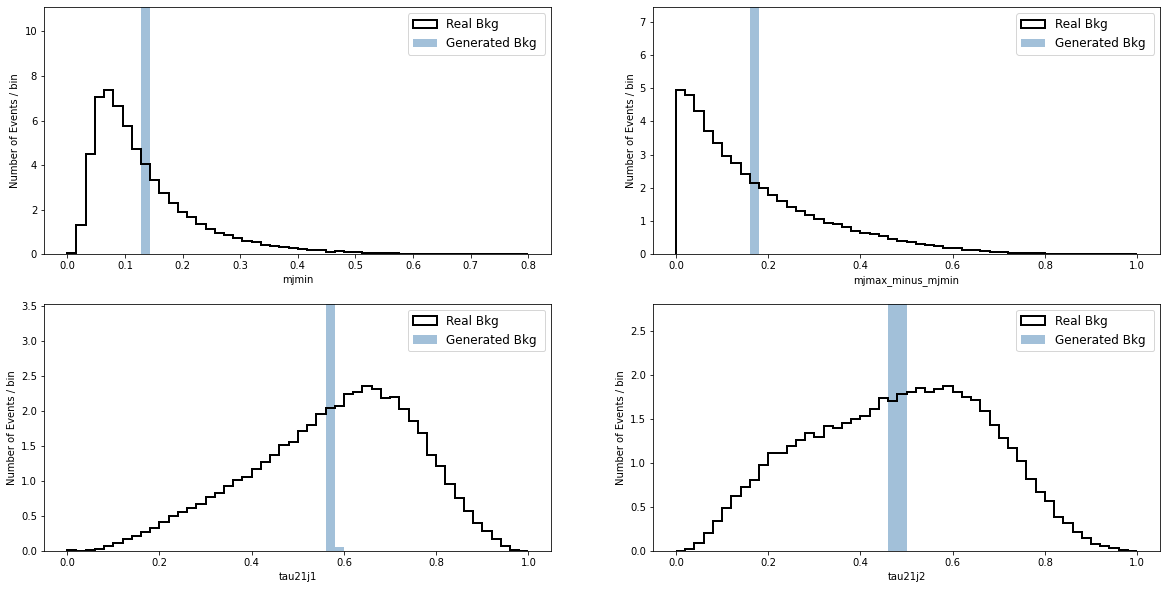

In [57]:
# cfake_sr = generate_cond_data(0,y_innerdata_train.shape[0],scaler_mjj.transform(y_innerdata_train.reshape(y_innerdata_train.shape[0],1)))
fake_vs_real([fake_SRs[0]],[X_innerdata_train],0,[""])


In [58]:
fake_SBs = []
for i in range(len(list_of_cgen_models)):

    fake_SB = generate_cond_data(i,y_data.shape[0],y_data)

    for i in range(0,fake_SB.shape[1]):
    	fake_SB[:,i]=fake_SB[:,i]*x_max[i]

    fake_SBs.append(fake_SB)

In [59]:
fake_SBs = np.array(fake_SBs)

In [60]:
print(fake_SBs[0].shape)

(878648, 4)


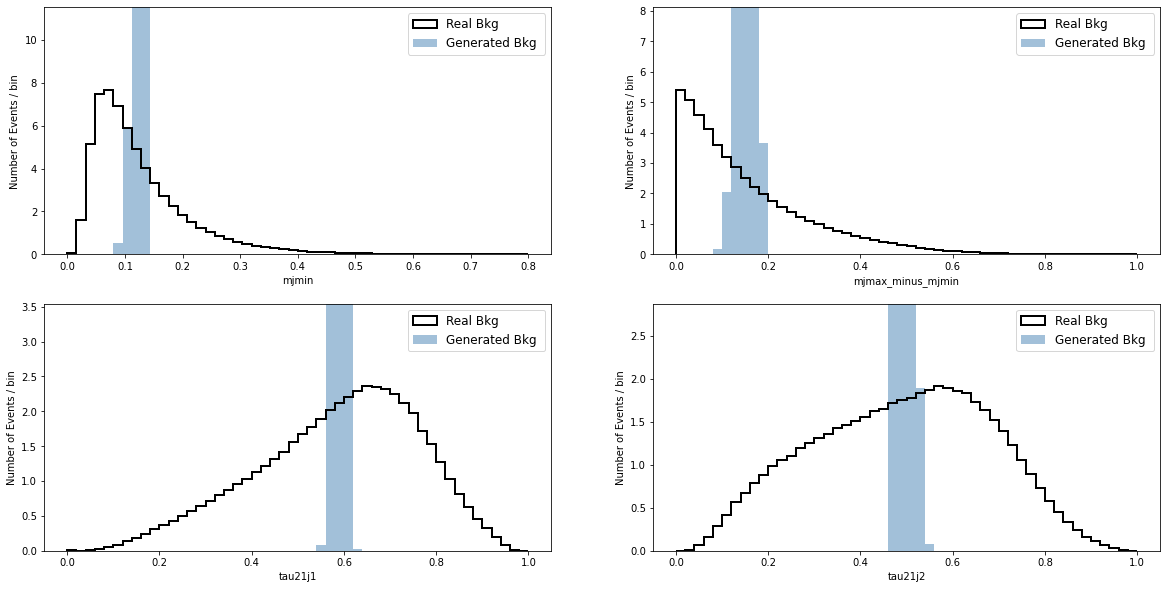

In [61]:
fake_vs_real([fake_SBs[0]],[X_data_unscaled],0,[""])

In [29]:
fileNameNN = '/workdir/huichi/DeepEvents/LHCO2020/4var/LHCO2020_cB-VAE_events.csv'
dfNN = pd.read_csv(fileNameNN, delimiter = ' ', header=None, index_col=False)
dNN = dfNN.to_numpy()

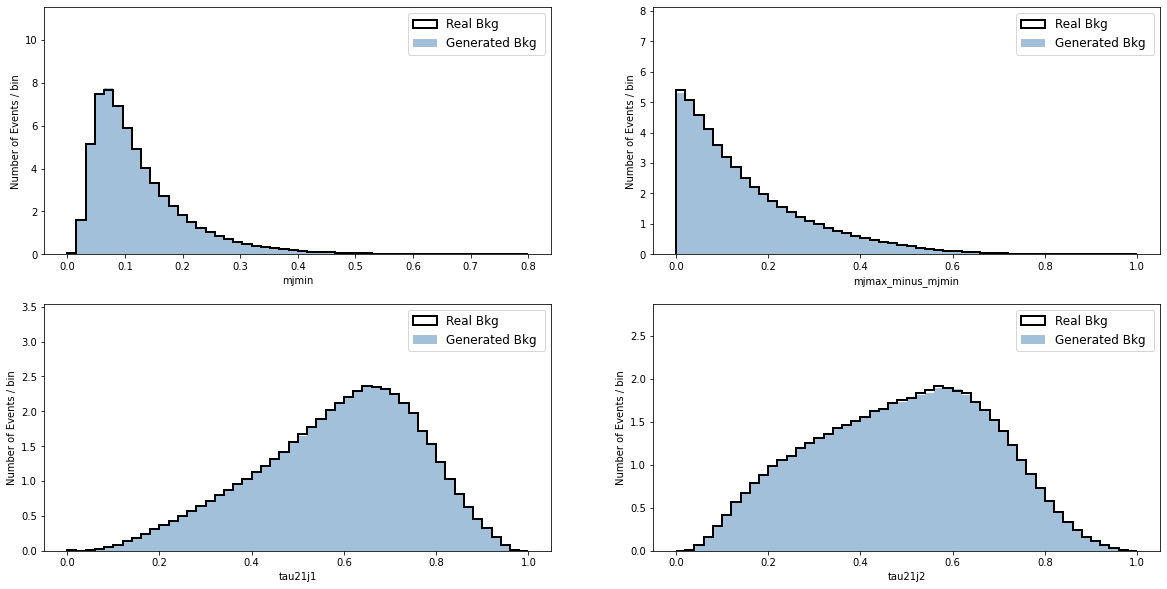

In [30]:
fake_vs_real([dNN],[X_data_unscaled],0,[""])

In [32]:
# Loop over signal size
aucs = []
rocs = []
losses = []
val_losses = []
accs = []
val_accs = []
num_epoch=1000
batch_size=5096

ts = 60000

bkg_models = [x_fake_SR, x_real_SR]
bkg_names = ["GAN", "MC"]

NameError: name 'x_fake_SR' is not defined

In [31]:
for background in bkg_models:
    X_train, X_val, X_test, Y_train, Y_val, Y_test = prep_and_shufflesplit_data(background, background, x_sig_SR, 1, size_each = ts, shuffle_seed = 62, val = 0.2, test_size_each = 10000)
    dense_sizes = (100,100)
    model = DNN(input_dim=8, dropouts=0.2, l2_regs=1e-4, dense_sizes=dense_sizes, summary=False)
    auc, roc, loss, acc, val_loss, val_acc = trainingNN(model, num_epoch, 100, batch_size, X_train, X_val, X_test, Y_train, Y_val, Y_test)
    rocs.append(roc)
    aucs.append(auc)
    losses.append(loss)
    accs.append(acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

NameError: name 'bkg_models' is not defined